# Simple portfolio optimization
We consider a portfolio optimization problem as described on the *Convex Optimization Applications* slides.

## (a)
Find minimum-risk portfolios with the same expected return as the uniform portfolio ($w =
(1/n)1$), with risk measured by portfolio return variance, and the following portfolio constraints
(in addition to $1^Tw = 1$):

* No (additional) constraints.
* Long-only: $w \geq 0$.
* Limit on total short position: $1^T(w_-) \leq 0.5$, where $(w_-)_i = \max\{−w_i
, 0\}$.

Compare the optimal risk in these portfolios with each other and the uniform portfolio.

In [1]:
# Construct problem data.
import numpy as np

np.random.seed(1)
n = 20
mu = np.ones((n,1))*.03 + np.r_[np.random.rand(n-1,1), np.zeros((1,1))]*.12;
S = np.random.randn(n, n); S = np.asmatrix(S)
S = S.T*S
S = S/max(np.abs(np.diag(S)))*.2
S[:, -1] = np.zeros((n, 1))
S[-1, :] = np.zeros((n, 1)).T
w_unif = np.ones((n, 1))/n; w_unit = np.asmatrix(w_unif)

In [2]:
import cvxpy as cvx
w = cvx.Variable(n)

# Uniform portfolio
print 'Risk for uniform: %.2f%%' % float(np.sqrt(np.sum(mu)/n)*100)

# No additional constraints
risk = cvx.quad_form(w, S)
ret = mu.T*w
cvx.Problem(cvx.Minimize(risk), [cvx.sum_entries(w) == 1, ret == mu.sum()/n]).solve()
print 'Risk for unconstrained: %.2f%%' % float(np.sqrt(risk.value)*100)

# Long only
cvx.Problem(cvx.Minimize(risk), [cvx.sum_entries(w) == 1, ret == mu.sum()/n, w >= 0]).solve()
print 'Risk for long only: %.2f%%' % float(np.sqrt(risk.value)*100)

# Limit on total short position
cvx.Problem(cvx.Minimize(risk), [cvx.sum_entries(w) == 1, ret == mu.sum()/n, 
                                 cvx.sum_entries(cvx.neg(w)) <= 0.5]).solve()
print 'Risk for limit on short: %.2f%%' % float(np.sqrt(risk.value)*100)

Risk for uniform: 27.00%
Risk for unconstrained: 0.90%
Risk for long only: 3.95%
Risk for limit on short: 1.50%


## (b)

Plot the optimal risk-return trade-off curves for the long-only portfolio, and for total short position limited to 0.5, in the same figure.

Comment on the relationship between the two trade-off curves.

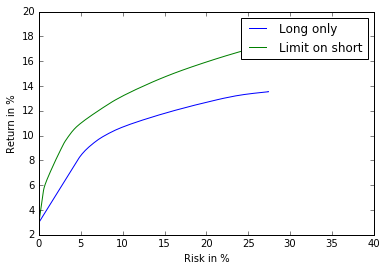

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

w = cvx.Variable(n)
gamma = cvx.Parameter(sign='positive')
N = 128

# Long only
ret = mu.T*w
risk = cvx.quad_form(w, S)
prob = cvx.Problem(cvx.Maximize(ret - gamma*risk), 
                   [cvx.sum_entries(w) == 1, w >= 0])

gamma_vals = np.logspace(-1,5,num=N)
return_vec1 = np.zeros((N,1))
risk_vec1 = np.zeros((N,1))
for i in range(N):
    gamma.value = gamma_vals[i]
    prob.solve()
    return_vec1[i] = ret.value
    risk_vec1[i] = risk.value
plt.figure()
plt.plot(np.sqrt(risk_vec1)*100, return_vec1*100, label='Long only')

# Limit on short
prob = cvx.Problem(cvx.Maximize(ret - gamma*risk), 
            [cvx.sum_entries(w) == 1, cvx.sum_entries(cvx.neg(w)) <= 0.5])

return_vec2 = np.zeros((N,1))
risk_vec2 = np.zeros((N,1))
for i in range(N):
    gamma.value = gamma_vals[i]
    prob.solve()
    return_vec2[i] = ret.value
    risk_vec2[i] = risk.value
    
plt.plot(np.sqrt(risk_vec2)*100, return_vec2*100, label='Limit on short')
plt.legend()
plt.xlabel('Risk in %')
plt.ylabel('Return in %')
plt.show()